    ******************************************
       Modified Gravity extensions enabled:  
       Modifications active for z < 99.000    
       For the nDGP model
    ******************************************


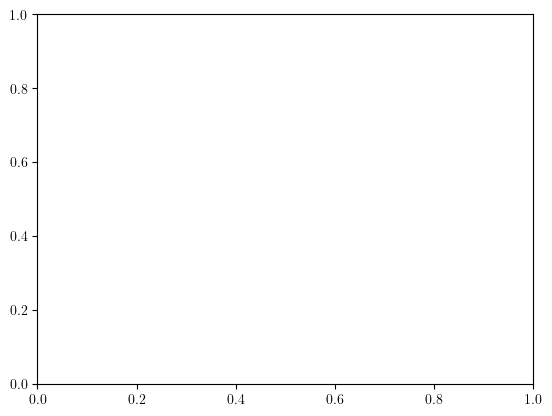

<Figure size 640x480 with 0 Axes>

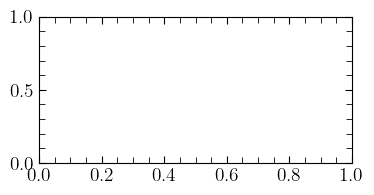

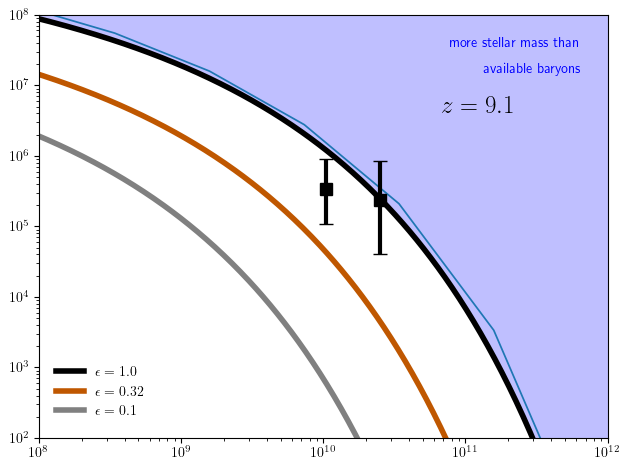

In [7]:

# some_file.py
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy import integrate
from scipy.special import lambertw
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pylab as pl
import matplotlib as mpl
import matplotlib
from scipy import interpolate
import scipy
import sys
sys.path.insert(0, "../")
sys.path.insert(0,'../observational_data/GSMF')
from JWST_MG.reionization import reionization
from JWST_MG.cosmological_functions import cosmological_functions
from JWST_MG.constants import *
from JWST_MG.HMF import HMF
from JWST_MG.SMF import SMF
from JWST_MG.SMD import SMD

plt.rcParams.update({"text.usetex": True})


class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(
            self, useOffset=offset, useMathText=mathText)

    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom

    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format


plt.cla()
plt.figure()
plt.rcParams.update({"text.usetex": True})
fig = plt.figure(figsize=(4.25*1*.95, 1*2*0.95))
"""
ax = plt.subplot(4, 1, 1)


ax.xaxis.set_ticks([0, 0.25, 0.5, 0.75, 1])
ax.yaxis.set_ticks([0, 0.5, 1, 1.5])


ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.tick_params(axis='both', which='major', direction="in",
                labelsize=14, length=5, top=True, right=True)
plt.tick_params(axis='both', which='minor', direction="in",
                labelsize=11, length=4, top=True, right=True)
plt.tick_params(axis='both', which='major',
                direction="in", labelsize=14, length=5)
plt.tick_params(axis='both', which='minor',
                direction="in", labelsize=11, length=4)


model = 'E11'
model_H = 'LCDM'
model_SFR = 'toy'

par2 = 6/11
ac = 1
a_arr = np.linspace(ai, ac, 10000)
pars1 = np.linspace(1, -1, 2)

n = len(pars1)
colors = pl.cm.Blues(np.linspace(0, 1, n))

for i in range(len(pars1)):
    par1 = pars1[i]
    deltac = delta_c(ac, model, model_H, par1, par2)
    deltai_collapse = deltac.binary_search_di(
        ac, model, model_H, par1, par2, 0, len(delta_ini), abs_err)
    delta = deltac.linear(deltai_collapse, ac,
                          model, model_H, par1, par2)
    print("a")
    # print(Deltavir)
    plt.plot(delta[:, 0], delta[:, 1], c=colors[i])


norm = plt.Normalize(pars1.min(), pars1.max())
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=pl.cm.Blues, norm=norm), ax=ax)
cbar.set_label(r'$E_{11}$', fontsize=16)

plt.ylabel(r'$\delta_{\rm m}(a)$', size='16')

# plt.xlim(10**(-3),1)
# plt.legend(loc='best')
plt.grid(".")
ax.set_xticklabels([])

h, l = ax.get_legend_handles_labels()
kw = dict(ncol=3, loc="lower center",
          fancybox=True, fontsize=11, frameon=False)
leg1 = ax.legend(h[:], l[:], bbox_to_anchor=[0.5, 1.08], **kw)
ax.add_artist(leg1)
plt.axhline(1.675, c='tab:gray', lw=0.8)
plt.text(0.1, 1.375, r'$\delta_{\rm c}|_{G_{\rm eff}=1}$',
         fontsize=13, c='tab:grey')
ax.fill_between([-0.1, 1.1], 1.675-0.025, 1.675 +
                0.025, alpha=0.25, color='tab:gray')
plt.xlim(-0.05, 1.05)

ax = plt.subplot(4, 1, 2)


ax.xaxis.set_ticks([0, 0.25, 0.5, 0.75, 1])
ax.yaxis.set_ticks([0, 0.5, 1, 1.5])


ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.tick_params(axis='both', which='major', direction="in",
                labelsize=14, length=5, top=True, right=True)
plt.tick_params(axis='both', which='minor', direction="in",
                labelsize=11, length=4, top=True, right=True)
plt.tick_params(axis='both', which='major',
                direction="in", labelsize=14, length=5)
plt.tick_params(axis='both', which='minor',
                direction="in", labelsize=11, length=4)


model = 'gmu'
model_H = 'LCDM'
model_SFR = 'toy'

par2 = 6/11
ac = 1
a_arr = np.linspace(ai, ac, 10000)
pars1 = np.linspace(0, 1, 2)

n = len(pars1)
colors = pl.cm.Blues(np.linspace(0, 1, n))

for i in range(len(pars1)):
    par1 = pars1[i]
    deltac = delta_c(ac, model, model_H, par1, par2)
    deltai_collapse = deltac.binary_search_di(
        ac, model, model_H, par1, par2, 0, len(delta_ini), abs_err)
    delta = deltac.linear(deltai_collapse, ac,
                          model, model_H, par1, par2)
    print("a")
    # print(Deltavir)
    plt.plot(delta[:, 0], delta[:, 1], c=colors[i])


norm = plt.Normalize(pars1.min(), pars1.max())
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=pl.cm.Blues, norm=norm), ax=ax)
cbar.set_label(r'$g_{\mu}$', fontsize=16)

plt.ylabel(r'$\delta_{\rm m}(a)$', size='16')

# plt.xlim(10**(-3),1)
# plt.legend(loc='best')
plt.grid(".")
ax.set_xticklabels([])

h, l = ax.get_legend_handles_labels()
kw = dict(ncol=3, loc="lower center",
          fancybox=True, fontsize=11, frameon=False)
leg1 = ax.legend(h[:], l[:], bbox_to_anchor=[0.5, 1.08], **kw)
ax.add_artist(leg1)
plt.axhline(1.675, c='tab:gray', lw=0.8)
plt.text(0.1, 1.375, r'$\delta_{\rm c}|_{G_{\rm eff}=1}$',
         fontsize=13, c='tab:grey')
ax.fill_between([-0.1, 1.1], 1.675-0.025, 1.675 +
                0.025, alpha=0.25, color='tab:gray')
plt.xlim(-0.05, 1.05)
"""

"""
ax = plt.subplot(4, 1, 3)


ax.xaxis.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.yaxis.set_ticks([0, 0.5, 1, 1.5])

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.tick_params(axis='both', which='major', direction="in",
                labelsize=14, length=5, top=True, right=True)
plt.tick_params(axis='both', which='minor', direction="in",
                labelsize=11, length=4, top=True, right=True)
plt.tick_params(axis='both', which='major',
                direction="in", labelsize=14, length=5)
plt.tick_params(axis='both', which='minor',
                direction="in", labelsize=11, length=4)


model = 'DES'
model_H = 'LCDM'
model_SFR = 'toy'

pars2 = np.array([0, 5, -5])
ac = 1
a_arr = np.linspace(ai, ac, 10000)
pars1 = np.linspace(0, 1, 2)

n = len(pars1)
colors = np.array([pl.cm.Blues(np.linspace(0, 1, n)), pl.cm.Reds(
    np.linspace(0, 1, n)), pl.cm.Purples(np.linspace(0, 1, n))])

for j in range(len(pars2)):
    par2 = pars2[j]
    for i in range(len(pars1)):
        par1 = pars1[i]
        deltac = delta_c(ac, model, model_H, par1, par2)
        deltai_collapse = deltac.binary_search_di(
            ac, model, model_H, par1, par2, 0, len(delta_ini), abs_err)
        delta = deltac.linear(deltai_collapse, ac,
                              model, model_H, par1, par2)
        print("a")
        # print(Deltavir)
        plt.plot(delta[:, 0], delta[:, 1], c=colors[j][i], alpha=0.3, lw=0.75)


norm = plt.Normalize(pars1.min(), pars1.max())
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=pl.cm.Blues, norm=norm), ax=ax)
cbar.set_label(r'$T_{1}$', fontsize=16)

plt.ylabel(r'$\delta_{\rm m}(a)$', size='16')

# plt.xlim(10**(-3),1)
# plt.legend(loc='best')
plt.grid(".")
ax.set_xticklabels([])

h, l = ax.get_legend_handles_labels()


line1 = Line2D([0], [0], label=r'$T_2=0$', color='tab:blue')
line2 = Line2D([0], [0], label=r'$T_2=5$', color='tab:red')
line3 = Line2D([0], [0], label=r'$T_2=-5$', color='tab:purple')
h.extend([line1, line2, line3])
kw = dict(ncol=1,
          fancybox=True, fontsize=10, frameon=False)
# leg1 = ax.legend(h[:], l[:], bbox_to_anchor=[0.5, 1.08], **kw)
ax.legend(handles=h, loc='lower right', **kw)

plt.axhline(1.675, c='tab:gray', lw=0.8)
plt.text(0.1, 1.375, r'$\delta_{\rm c}|_{G_{\rm eff}=1}$',
         fontsize=13, c='tab:grey')
ax.fill_between([-0.1, 1.1], 1.675-0.025, 1.675 +
                0.025, alpha=0.4, color='tab:gray')
plt.xlim(-0.05, 1.05)
"""


ax = plt.subplot(1, 1, 1)


ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.tick_params(axis='both', which='major', direction="in",
                labelsize=14, length=5, top=True, right=True)
plt.tick_params(axis='both', which='minor', direction="in",
                labelsize=11, length=4, top=True, right=True)
plt.tick_params(axis='both', which='major',
                direction="in", labelsize=14, length=5)
plt.tick_params(axis='both', which='minor',
                direction="in", labelsize=11, length=4)



arq = open("../observational_data/hopkins_2004.dat", 'r')
data= np.loadtxt(arq, delimiter=",")
def errorData():
    """Return the asymetric errors in the redshif and CSFR
    respectively
    """
    xerr = np.array([data[:, 0] - data[:, 2],
            data[:, 3] - data[:, 0]])
    yerr = np.array([data[:, 1] - data[:, 4],
                    data[:, 5] - data[:, 1]])
    return xerr, yerr

def csfredshift():
    """Return the redshift and the CSFR from
    observational data
    """
    return data[:, 0], data[:, 1]


xerr, yerr = errorData()
x, y = csfredshift()

#plt.errorbar(x, y, yerr=yerr, xerr=xerr, fmt='.')
from multiprocessing import Pool
#############################################
#
# extract spectra and plot them
#
#############################################
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy import integrate
from scipy.special import lambertw
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pylab as pl


"""
Common functions used in all plots and compute_implied_epsilon.py
"""

import numpy
from numpy import log, log10, sqrt, exp, pi, arange, logspace, linspace, r_, c_
# Don't judge me: 
from matplotlib.pyplot import *
from scipy.interpolate import UnivariateSpline as US
import hmf
from astropy.cosmology import FlatLambdaCDM

bo_color='#BF5700'
top_color='DodgerBlue'
my_cmap=get_cmap('plasma')

# Planck2020 parameters:
h0=0.6732
om0=0.3158
ob0h2=0.022383
ob0=ob0h2/h0**2
ns=0.96605
sig8=0.8120
t_cmb=2.7255
# f_bary=Omega_b/Omega_m
fbary=ob0h2/h0**2/om0


# set up cosmological model:
planck2020_model=FlatLambdaCDM(H0 = 100*h0, Om0=om0, Tcmb0 = t_cmb, Ob0 = ob0)

######################################################################
# Planck2020 + Early Dark Energy (EDE) parameters (Smith et al. 2022):
h0_ede=0.7483
om0_ede=0.287
ob0h2_ede=0.02278
ob0_ede=ob0h2_ede/h0_ede**2
ns_ede=1.003
sig8_ede=0.829/(om0_ede/0.3)**0.5
# f_bary=Omega_b/Omega_m
fbary_ede=ob0h2_ede/h0_ede**2/om0_ede

# set up cosmological model:
planck2020_ede=FlatLambdaCDM(H0 = 100*h0_ede, Om0=om0_ede,
                             Tcmb0 = t_cmb, Ob0 = ob0_ede)
######################################################################


######################################################################
# hmf parameters:
######################################################################
# standard min value to compute mass function (in log10):
min_mval_log10=7
# min value to compute mass function (in log10) for nu calcs (should be low):
min_mval_nu_log10=-2
# max value to compute mass function (in log10) for nu calcs (should be hi):
max_mval_nu_log10=16.5

# comoving matter density (in h**2 Msun/Mpc^3)
rhom0=om0*277.8e9
# comoving matter density (in Msun/Mpc^3)
rhom0_noh=rhom0*h0**2
# comoving baryon density (in Msun/Mpc**3):  
rhob0_noh=rhom0_noh/om0*ob0
# comoving baryon density (in h**2 Msun/Mpc**3): 
rhob0=rhob0_noh/h0**2


######################################################################
# read in Labbe et al. data:
######################################################################
mydtype_mstar=numpy.dtype([('id', 'i4'), ('z', 'f4'),
                           ('z_low', 'f4'), ('z_hi', 'f4'),
                           ('z_xlow', 'f4'), ('z_xhi', 'f4'),  
                           ('log10_mstar', 'f4'),
                           ('log10_mstar_lo', 'f4'), ('log10_mstar_hi', 'f4'),
                           ('log10_mstar_xlo', 'f4'), ('log10_mstar_xhi', 'f4')])

mstar_data=numpy.loadtxt('labbe_stellar_masses.dat',
                         dtype=mydtype_mstar, skiprows=39, 
                         usecols=(0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

# sort by mass (descending)
my_argsort_mass=numpy.argsort(mstar_data['log10_mstar'])[::-1]
mstar_data=mstar_data[my_argsort_mass]


mydtype_rhostar=numpy.dtype([('mstar', 'f4'),
                             ('rhostar', 'f4'), 
                             ('rhostar_lo', 'f4'), ('rhostar_hi', 'f4')])

rhostar_data_z9=numpy.loadtxt('mass_cumul_z9.dat', dtype=mydtype_rhostar)
rhostar_data_z8=numpy.loadtxt('mass_cumul_z8.dat', dtype=mydtype_rhostar)

# get redshifts of 2 most massive candidates
zz8=mstar_data['z'][0]
zz9=mstar_data['z'][1]


######################################################################


# 4 pi steradians converted to arcmin^2:
arcmin2_fullsky=(180/pi)**2*4*pi*60**2
# CEERS area, according to Labbe:
ceers_arcmin2=38.0
# volume fraction is ceers area divided full sky volume
vol_frac=ceers_arcmin2/arcmin2_fullsky


zlow_labbe=7.0
zmid_labbe=8.5
zhi_labbe=10.0

# comoving volume between z=8.5 and z=10 in the CEERS area in this cosmology;
# this is the higher z bin
vol_z9=(planck2020_model.comoving_volume(zhi_labbe).value -
        planck2020_model.comoving_volume(zmid_labbe).value)*vol_frac


# comoving volume between z=7 and 8.5 in the CEERS area in this cosmology;
# this is the lower z bin:
vol_z8=(planck2020_model.comoving_volume(zmid_labbe).value -
        planck2020_model.comoving_volume(zlow_labbe).value)*vol_frac


# same volumes in EDE:
vol_z9_ede=(planck2020_ede.comoving_volume(zhi_labbe).value -
            planck2020_ede.comoving_volume(zmid_labbe).value)*vol_frac


vol_z8_ede=(planck2020_ede.comoving_volume(zmid_labbe).value -
            planck2020_ede.comoving_volume(zlow_labbe).value)*vol_frac



######################################################################
# get halo mass function data:
my_mf=hmf.MassFunction(Mmin=min_mval_log10, hmf_model='SMT',
                       cosmo_model=planck2020_model,
                       sigma_8=sig8, n=ns,
                       transfer_model=hmf.density_field.transfer_models.CAMB,
                       transfer_params={'extrapolate_with_eh':True})

# array of halo masses, for standard parameter inputs
mvals_noh=my_mf.m/h0


# a version that is appropriate for nu, where M_min (M_max) is lower (higher)
my_mf_nu=hmf.MassFunction(Mmin=min_mval_nu_log10, Mmax=max_mval_nu_log10,
                          hmf_model='SMT',
                          cosmo_model=planck2020_model,
                          sigma_8=sig8, n=ns,
                          transfer_model=hmf.density_field.transfer_models.CAMB,
                          transfer_params={'extrapolate_with_eh':True})


my_mf.update(z=zz9)
rho_gtm=my_mf.rho_gtm*h0**2

# data from Labbe / van Dokkum
xvs=rhostar_data_z9['mstar'].copy()
yvs_log=log10(rhostar_data_z9['rhostar'].copy()/vol_z9)


yvs=10.**yvs_log
ye_low=yvs-rhostar_data_z9['rhostar_lo'].copy()/vol_z9
ye_upp=rhostar_data_z9['rhostar_hi'].copy()/vol_z9-yvs

my_xlims=r_[1e8, 1e12]
my_ylims=r_[1e2, 1e8]

######################################################################
figure()
errorbar(xvs, yvs,
         yerr=c_[ye_low, ye_upp].T,
         # xerr=c_[xe_low, xe_upp].T, 
         color='k', ecolor='k',
         ls='none', capsize=5, elinewidth=3, marker='s', ms=8, zorder=100)
loglog(mvals_noh*fbary, fbary*rho_gtm, 'k-', lw=4, label=r'$\epsilon=1.0$')
# if conversion efficiency is 31.6%:
loglog(mvals_noh*fbary*10**-0.5, fbary*rho_gtm*10**-0.5,
       ls='-', color=bo_color, lw=4, label=r'$\epsilon=0.32$')
# if conversion efficiency is 10%
loglog(mvals_noh*fbary*0.1, fbary*rho_gtm*0.1,
       ls='-', color='0.5', lw=4, label=r'$\epsilon=0.1$')

fill_between(mvals_noh*fbary, fbary*rho_gtm, 1e9, facecolor='b',
             alpha=0.25, edgecolors='face', linestyle='None', 
             lw=0)

xlim(*my_xlims)
ylim(*my_ylims)
legend(loc=(0.02, 0.035), frameon=False)
text(6.5e11, 3.5e7, 'more stellar mass than', color='b', ha='right')
text(6.5e11, 1.5e7, 'available baryons', color='b', ha='right')
text(1.25e11, 4e6, r'$z = 9.1$', fontsize=18, ha='center')

pool_cpu = Pool(8)



model = 'nDGP'
model_H = 'nDGP'
model_SFR = 'toy'
par1 = 10**9
par2 = 1
f0 = 1
z_int = np.array([9.1]) #np.linspace(12,5,35)
SMD_library = SMD(1/(1+z_int), model, model_H, model_SFR, par1, par2, 1e8, f0)
Pk_arr = []
for i, z_i in enumerate(z_int):
    HMF_library = HMF(1/(1+z_i), model, model_H, par1, par2, 1e8)
    Pk = np.array(HMF_library.Pk(1/(1+z_i), model, par1, par2))*h**3
k = kvec/h
Masses = np.logspace(8,14,10)


Masses_star, SMD = SMD_library.SMD(Masses, rhom, 1/(1+z_int[0]), model_H, model, model_SFR, par1, par2, k, Pk, f0)
loglog(Masses_star, SMD, c = 'tab:blue', lw = 1.25)


"""ac_arr = np.linspace(0.01, 1, 15)
par1 = 500
par2 = 0
deltac = delta_c(ac_arr, model, model_H, par1, par2)


di = deltac.binary_search_di(1, model, model_H, par1, par2,
                             0, len(delta_ini)-1, abs_err)
print(di)
delta_nl = deltac.collapse(di, model, model_H, par1, par2)
delta = delta_nl[:, 1]
a = delta_nl[:, 0]
cosmological_library = cosmological_functions(
    a, model, model_H, par1, par2)
H = cosmological_library.H_f(a, model_H, par1, par2)
dH = cosmological_library.dH_f(a, model_H, par1, par2)


G = 1/(8*np.pi)
Hdot = a*H*dH
beta = 1 + 2*H*par1/c*(1+Hdot/(3*H**2))
epsilon = 8/(9*beta**2)*(H0*par1/c)**2*Omegam0*a**(-3)
RRV = (epsilon*delta)**(-1/3)
mu = cosmological_library.mu(
    a, model, model_H, par1, par2, type='nonlinear', x=RRV)

plt.plot(a, epsilon*delta)


par1 = 3000
par2 = 0
deltac = delta_c(ac_arr, model, model_H, par1, par2)


di = deltac.binary_search_di(1, model, model_H, par1, par2,
                             0, len(delta_ini)-1, abs_err)
print(di)
delta_nl = deltac.collapse(di, model, model_H, par1, par2)
delta = delta_nl[:, 1]
a = delta_nl[:, 0]
cosmological_library = cosmological_functions(
    a, model, model_H, par1, par2)
H = cosmological_library.H_f(a, model_H, par1, par2)
dH = cosmological_library.dH_f(a, model_H, par1, par2)


G = 1/(8*np.pi)
Hdot = a*H*dH
beta = 1 + 2*H*par1/c*(1+Hdot/(3*H**2))
epsilon = 8/(9*beta**2)*(H0*par1/c)**2*Omegam0*a**(-3)
RRV = (epsilon*delta)**(-1/3)
mu = cosmological_library.mu(
    a, model, model_H, par1, par2, type='nonlinear', x=RRV)

plt.plot(a, epsilon*delta)
plt.xlim(0.3, 1)
plt.ylim(0.05, 500)
plt.yscale('log')

"""
"""model = 'nDGP'
model_H = 'nDGP'
par1 = 3000
par2 = 0.5
a_arr = np.linspace(0.1, 1, 10)
reion = reionization(a_arr, model, model_H, par1, par2)

R_arr = reion.radius_solve(model, model_H, par1, par2, a_arr)

plt.plot(a_arr, R_arr)
plt.yscale('log')"""
# plt.plot(a, mu)
"""

model = 'kmoufl'
model_H = 'kmoufl'
par2 = 0.5
ac_arr = np.array([0.1, 0.5, 0.75, 1])
pars1 = np.linspace(0.1, 0.3, 10)

n = len(ac_arr)
colors = pl.cm.Reds(np.linspace(0, 1, 5))


for i in range(len(ac_arr)):
    Delta = []
    ac = ac_arr[i]
    a_arr = np.linspace(ai, ac, 10000)
    for par1 in pars1:
        reion = reionization(a_arr, model, model_H, par1, par2)
        a_vir, Deltavir = reion.Delta_vir(model, model_H, par1, par2, a_arr)
        print(Deltavir)
        Delta.append(Deltavir)
        # print(Deltavir)
    plt.plot(pars1, Delta, c=colors[i+1])

plt.xscale('log')

plt.axhline(18*np.pi**2, ls=':', c='tab:blue')"""
"""
par1 = 3000
par2 = 0
ac_arr = np.linspace(0.01, 1, 15)

for ac in ac_arr:
    deltac = delta_c(ac, model, model_H, par1, par2)
    dc = deltac.delta_c_at_ac(ac, model, model_H, par1, par2)
    plt.scatter(ac, dc, c='tab:blue')

plt.axhline(1.688, c='tab:blue', ls=':')


par1 = 500
par2 = 0
ac_arr = np.linspace(0.01, 1, 15)

for ac in ac_arr:
    deltac = delta_c(ac, model, model_H, par1, par2)
    dc = deltac.delta_c_at_ac(ac, model, model_H, par1, par2)
    plt.scatter(ac, dc, c='tab:orange')

plt.axhline(1.687, c='tab:orange', ls=':')
"""
"""
model = 'nDGP'
par2 = 0.5
ac_arr = np.array([0.1, 0.5, 0.75, 1])
pars1 = np.logspace(2.69897000434, 5, 10)

n = len(ac_arr)
colors = pl.cm.Reds(np.linspace(0, 1, 5))


for i in range(len(ac_arr)):
    Delta = []
    ac = ac_arr[i]
    a_arr = np.linspace(ai, ac, 10000)
    for par1 in pars1:
        reion = reionization(a_arr, model, model_H, par1, par2)
        a_vir, Deltavir = reion.Delta_vir(model, model_H, par1, par2, a_arr)
        print(Deltavir)
        Delta.append(Deltavir)
        # print(Deltavir)
    plt.plot(pars1, Delta, c=colors[i+1])

plt.xscale('log')

plt.axhline(18*np.pi**2, ls=':', c='tab:blue')"""
"""
par2 = 0.3
ac_arr = np.linspace(0.01, 1, 15)
par1 = 3000


deltac = delta_c(ac_arr, model, model_H, par1, par2)


di = deltac.binary_search_di(1, model, model_H, par1, par2,
                             0, len(delta_ini)-1, abs_err)
print(di)
delta_nl = deltac.collapse(di, model, model_H, par1, par2)
delta = delta_nl[:, 1]
a = delta_nl[:, 0]
cosmological_library = cosmological_functions(
    a, model, model_H, par1, par2)
H = cosmological_library.H_f(a, model_H, par1, par2)
dH = cosmological_library.dH_f(a, model_H, par1, par2)


G = 1/(8*np.pi)
Hdot = a*H*dH
beta = 1 + 2*H*par1/c*(1+Hdot/(3*H**2))
epsilon = 8/(9*beta**2)*(H0*par1/c)**2*Omegam0*a**(-3)
RRV = (epsilon*delta)**(-1/3)
mu = cosmological_library.mu(
    a, model, model_H, par1, par2, type='nonlinear', x=RRV)

plt.plot(a, mu, ls='-', c='tab:orange')
mu = cosmological_library.mu(
    a, model, model_H, par1, par2, type='linear', x=RRV)

plt.plot(a, mu, ls=':', c='tab:orange')


par2 = 0.3
ac_arr = np.linspace(0.01, 1, 15)
par1 = 500


deltac = delta_c(ac_arr, model, model_H, par1, par2)


di = deltac.binary_search_di(1, model, model_H, par1, par2,
                             0, len(delta_ini)-1, abs_err)
print(di)
delta_nl = deltac.collapse(di, model, model_H, par1, par2)
delta = delta_nl[:, 1]
a = delta_nl[:, 0]
cosmological_library = cosmological_functions(
    a, model, model_H, par1, par2)
H = cosmological_library.H_f(a, model_H, par1, par2)
dH = cosmological_library.dH_f(a, model_H, par1, par2)


G = 1/(8*np.pi)
Hdot = a*H*dH
beta = 1 + 2*H*par1/c*(1+Hdot/(3*H**2))
epsilon = 8/(9*beta**2)*(H0*par1/c)**2*Omegam0*a**(-3)
RRV = (epsilon*delta)**(-1/3)
mu = cosmological_library.mu(
    a, model, model_H, par1, par2, type='nonlinear', x=RRV)

plt.plot(a, mu, ls='-', c='tab:blue')
mu = cosmological_library.mu(
    a, model, model_H, par1, par2, type='linear', x=RRV)

plt.plot(a, mu, ls=':', c='tab:blue')


plt.yscale('log')
plt.xlim(0.2, 1)"""
# p
"""
plt.yscale('log')
plt.ylabel(r'$\delta_{\rm m}(a)$', size='16')
# plt.ylim(1.65, 1.7)
# plt.axhline(1.686, c='tab:gray')

# plt.axhline(1.672, c='tab:gray', ls=':')
# plt.xlim(10**(-3),1)
# plt.legend(loc='best')
plt.grid(".")
"""


plt.tight_layout()
plt.savefig('delta_c.pdf', bbox_inches='tight')
